<h1>Neural Prophet Model<h1>

<h2>importing required libraries<h2>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from neuralprophet import NeuralProphet

<h2> importing dataset<h2>

In [4]:
df = pd.read_csv('weatherAUS.csv')
df = pd.DataFrame(df)
    df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


<h2>Pre-Processing Dataset<h2>

In [6]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
melb = df[df['Location'] == "Melbourne"]
melb = pd.DataFrame(melb)
melb['Date'] = pd.to_datetime(melb['Date'])
melb.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No
67205,2008-07-06,Melbourne,5.5,15.4,0.0,2.8,3.0,N,74.0,N,...,68.0,48.0,1023.1,1020.1,6.0,6.0,11.6,14.6,No,No
67206,2008-07-07,Melbourne,11.5,14.3,0.0,3.0,1.0,NNE,57.0,N,...,73.0,63.0,1016.3,1012.9,8.0,7.0,12.2,13.3,No,Yes
67207,2008-07-08,Melbourne,6.9,10.4,5.0,1.2,0.3,N,37.0,N,...,80.0,71.0,1017.1,1017.0,8.0,7.0,7.3,10.3,Yes,Yes
67208,2008-07-09,Melbourne,3.6,14.8,1.2,0.4,6.5,N,35.0,N,...,95.0,61.0,1023.1,1019.6,1.0,7.0,4.2,13.1,Yes,Yes
67209,2008-07-10,Melbourne,4.2,13.5,3.0,2.2,7.0,WNW,69.0,N,...,87.0,33.0,1009.4,1006.7,6.0,3.0,9.0,12.2,Yes,No


In [19]:
melb.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
Year                      int64
dtype: object

In [ ]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [24]:
melb['Year'] = melb['Date'].apply(lambda x : x.year)
melb = melb[melb['Year'] <= 2015]

In [11]:
melb.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
69846,2015-12-27,Melbourne,NaN,NaN,NaN,4.4,8.9,SSE,48.0,SSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69847,2015-12-28,Melbourne,NaN,NaN,NaN,6.0,13.3,SSE,39.0,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69848,2015-12-29,Melbourne,NaN,NaN,NaN,8.0,13.4,S,35.0,SSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69849,2015-12-30,Melbourne,NaN,NaN,NaN,7.0,12.4,SSE,44.0,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69850,2015-12-31,Melbourne,NaN,NaN,NaN,15.2,11.4,NNW,48.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [12]:
data = melb[['Date', 'Temp3pm']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data

WARNING - (py.warnings._showwarnmsg) - C:\Users\Junaid Ahmed\AppData\Local\Temp\ipykernel_8664\2962094750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6
...,...,...
69486,2015-01-01,23.7
69487,2015-01-02,37.7
69488,2015-01-03,37.4
69489,2015-01-04,21.8


<h1>Training Neural Prophet Model<h1>

In [14]:
model = NeuralProphet()
model.fit(data, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.14E-02, min: 1.27E+00


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.14E-02, min: 2.03E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.55E-02
Epoch[152/152]: 100%|██████████| 152/152 [00:31<00:00,  4.79it/s, SmoothL1Loss=0.0145, MAE=3.02, RMSE=3.93, Loss=0.0108, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,0.554508,21.956348,27.078194,0.405214,0.0
1,0.482006,20.116472,24.708315,0.350730,0.0
2,0.394008,17.822487,21.866028,0.285147,0.0
3,0.290268,14.969289,18.239358,0.208635,0.0
4,0.183389,11.618212,14.173475,0.130425,0.0
...,...,...,...,...,...
147,0.014540,3.023049,3.934875,0.010854,0.0
148,0.014533,3.023144,3.928820,0.010852,0.0
149,0.014521,3.020910,3.930300,0.010841,0.0
150,0.014517,3.020652,3.920079,0.010837,0.0


<h1>Forecasting<h1>

In [15]:
future = model.make_future_dataframe(data, periods=900)
forecast = model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,residual1,yhat1,trend,season_yearly,season_weekly
0,2015-01-06,None,NaN,25.866047,20.246803,5.335982,0.283261
1,2015-01-07,None,NaN,25.698860,20.247511,5.472774,-0.021424
2,2015-01-08,None,NaN,25.931072,20.248219,5.605581,0.077272
3,2015-01-09,None,NaN,26.024830,20.248928,5.733715,0.042188
4,2015-01-10,None,NaN,26.077896,20.249638,5.856516,-0.028257


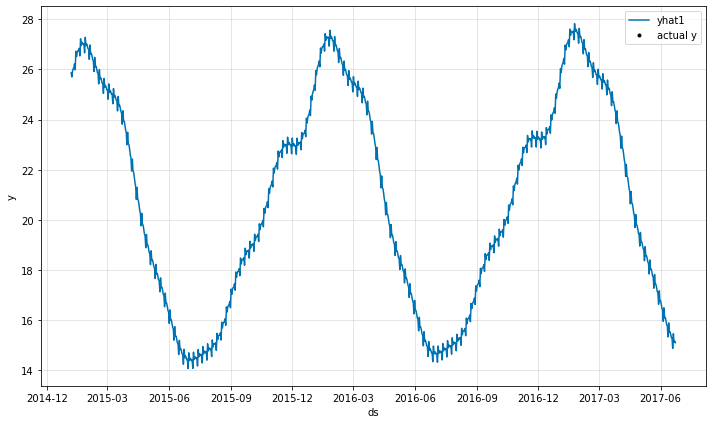

In [20]:
modelplot = model.plot(forecast)

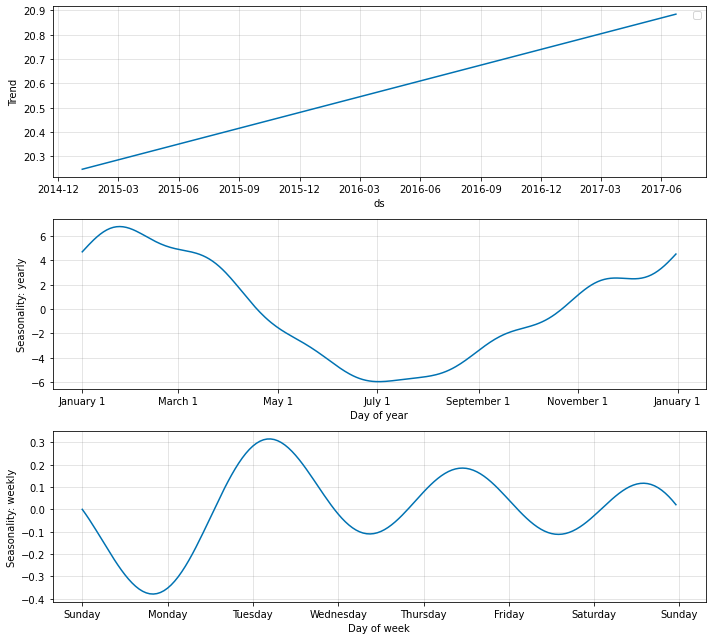

In [21]:
modelplot2 = model.plot_components(forecast)

In [25]:
data = melb[['Date', 'Temp9am']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data

WARNING - (py.warnings._showwarnmsg) - C:\Users\Junaid Ahmed\AppData\Local\Temp\ipykernel_8664\1228905524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
67200,2008-07-01,11.0
67201,2008-07-02,11.8
67202,2008-07-03,10.6
67203,2008-07-04,10.2
67204,2008-07-05,5.5
...,...,...
69487,2015-01-02,20.8
69488,2015-01-03,30.5
69489,2015-01-04,16.8
69490,2015-01-05,18.4


In [26]:
model1 = NeuralProphet()
model1.fit(data, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.782% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.23E-01, min: 2.68E-01


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.23E-01, min: 3.14E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.15E-01
Epoch[152/152]: 100%|██████████| 152/152 [00:30<00:00,  4.91it/s, SmoothL1Loss=0.0114, MAE=2.39, RMSE=3.08, Loss=0.00847, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,1.681341,44.902732,48.868029,1.284489,0.0
1,1.494499,40.981816,44.806909,1.136142,0.0
2,1.255537,35.933265,39.589127,0.945840,0.0
3,0.935515,29.010151,32.532468,0.692229,0.0
4,0.548088,20.124793,23.447220,0.388349,0.0
...,...,...,...,...,...
147,0.011421,2.395033,3.101896,0.008519,0.0
148,0.011385,2.382208,3.095705,0.008492,0.0
149,0.011369,2.387153,3.090812,0.008482,0.0
150,0.011358,2.388173,3.092925,0.008472,0.0


In [32]:
future1 = model1.make_future_dataframe(data, periods=5000)
forecast1 = model1.predict(future1)
forecast1.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.782% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.98% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.98% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,residual1,yhat1,trend,season_yearly,season_weekly
0,2015-01-07,None,NaN,19.940783,15.341867,4.577932,0.020985
1,2015-01-08,None,NaN,20.195969,15.342556,4.692261,0.161153
2,2015-01-09,None,NaN,20.377523,15.343243,4.805539,0.228744
3,2015-01-10,None,NaN,20.173319,15.343929,4.917082,-0.087692
4,2015-01-11,None,NaN,20.166336,15.344618,5.026216,-0.204497


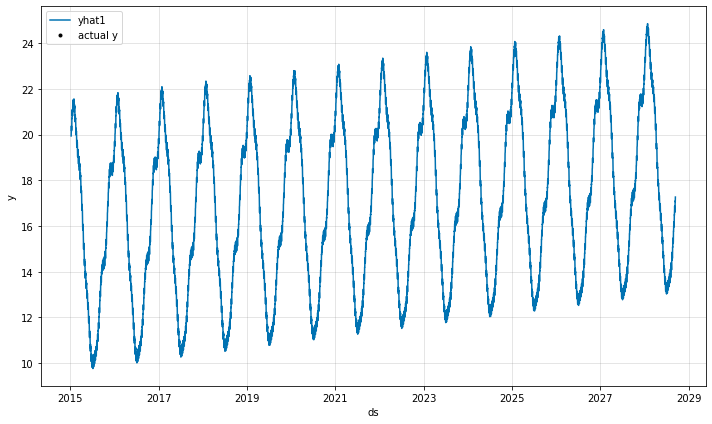

In [33]:
modelplot1 = model1.plot(forecast1)

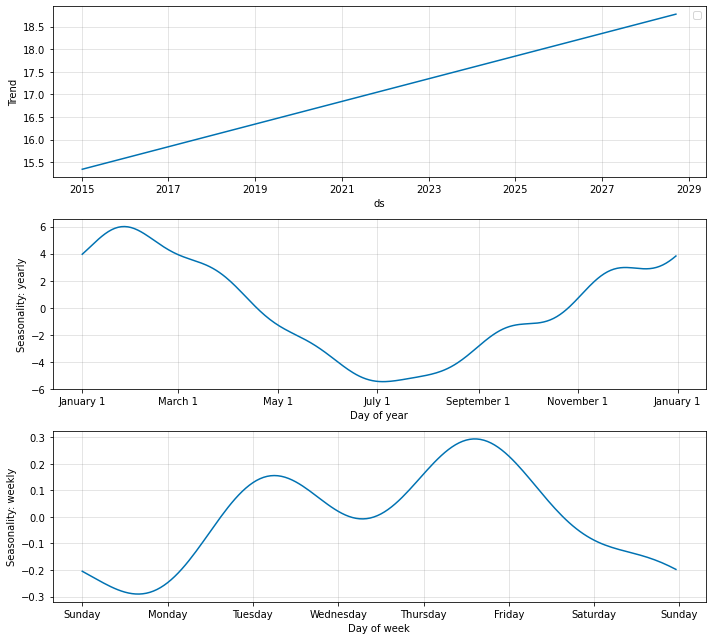

In [34]:
modelplot20 = model1.plot_components(forecast1)

<h2>Saving and reloading the model<h2>

In [ ]:
with open('forecast_model.pkl', 'rb') as f:
    reload_model = pickle.load(f)

In [ ]:
reload_model